# Breast Cancer Classification
## 21239

## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading data

In [23]:
from sklearn.datasets import load_breast_cancer
data = pd.DataFrame(load_breast_cancer()['data'], 
columns=load_breast_cancer()['feature_names']) 
data['y'] = load_breast_cancer()['target'] 

In [24]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 3. Preprocess

In [26]:
data.corr()[-1:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
y,-0.730029,-0.415185,-0.742636,-0.708984,-0.35856,-0.596534,-0.69636,-0.776614,-0.330499,0.012838,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.65961,-0.793566,-0.416294,-0.323872,1.0


In [31]:
t = data.iloc[np.where(abs(data.corr()[-1:]) > 0.7)]
column = t.columns
df = pd.DataFrame()
for col in column:
    df[col] = data[col]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean radius           569 non-null    float64
 1   mean perimeter        569 non-null    float64
 2   mean area             569 non-null    float64
 3   mean concave points   569 non-null    float64
 4   worst radius          569 non-null    float64
 5   worst perimeter       569 non-null    float64
 6   worst area            569 non-null    float64
 7   worst concave points  569 non-null    float64
 8   y                     569 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 37.9 KB


These are the features that have high correaltion with target

No null values

In [33]:
df.corr()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points,y
mean radius,1.000000,0.997855,0.987357,0.822529,0.969539,0.965137,0.941082,0.744214,-0.730029
mean perimeter,0.997855,1.000000,0.986507,0.850977,0.969476,0.970387,0.941550,0.771241,-0.742636
mean area,0.987357,0.986507,1.000000,0.823269,0.962746,0.959120,0.959213,0.722017,-0.708984
mean concave points,0.822529,0.850977,0.823269,1.000000,0.830318,0.855923,0.809630,0.910155,-0.776614
worst radius,0.969539,0.969476,0.962746,0.830318,1.000000,0.993708,0.984015,0.787424,-0.776454
worst perimeter,0.965137,0.970387,0.959120,0.855923,0.993708,1.000000,0.977578,0.816322,-0.782914
worst area,0.941082,0.941550,0.959213,0.809630,0.984015,0.977578,1.000000,0.747419,-0.733825
worst concave points,0.744214,0.771241,0.722017,0.910155,0.787424,0.816322,0.747419,1.000000,-0.793566
y,-0.730029,-0.742636,-0.708984,-0.776614,-0.776454,-0.782914,-0.733825,-0.793566,1.000000


## 4. EDA

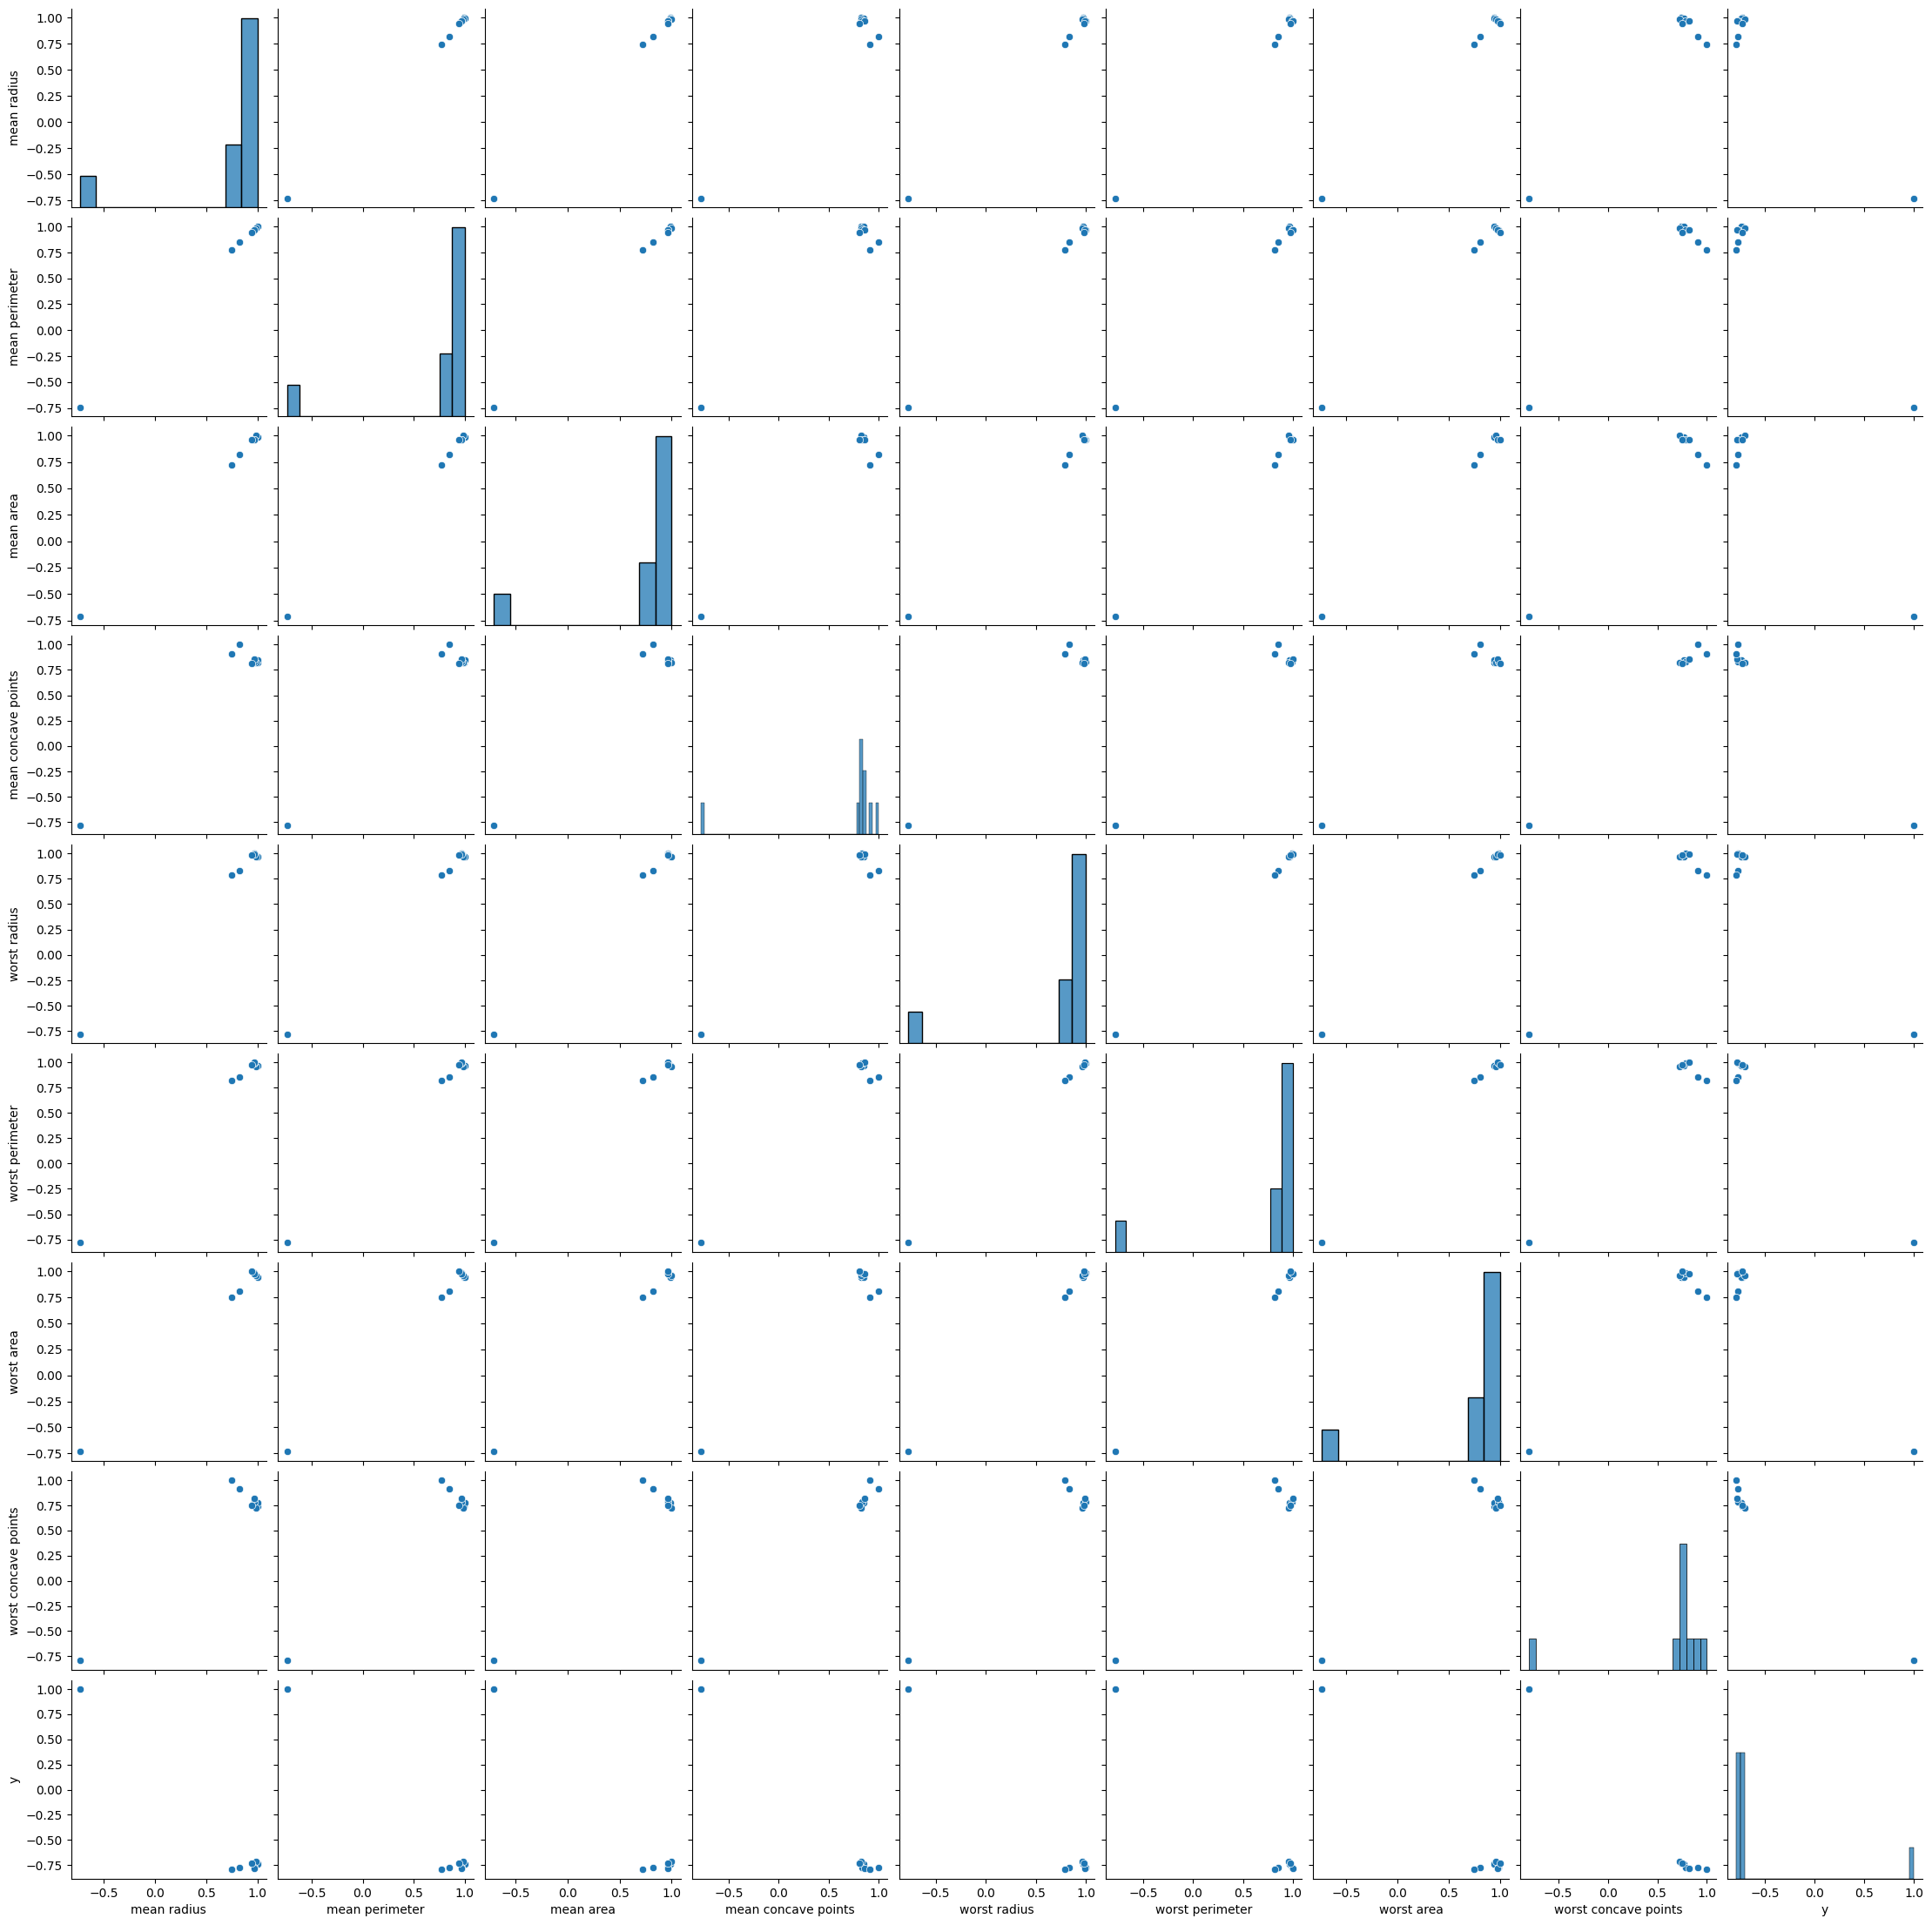

In [34]:
sns.pairplot(df.corr())
plt.show()

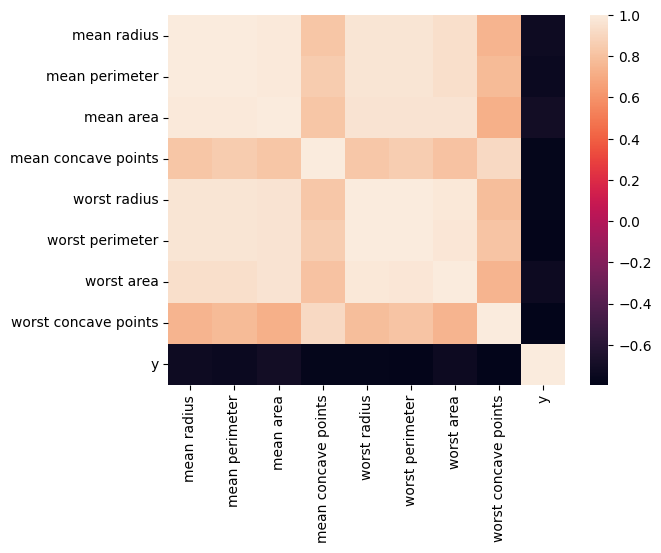

In [35]:
sns.heatmap(df.corr())
plt.show()

Inference:
 - All the selected features are highly correlated with target variable, among all of the selected variables Worstconcave points is highly correlated to target compared to other variables

## 5. Modeling

### Decision Tree

In [72]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = np.array(df['worst concave points'])
y = np.array(df['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=50)
clf = clf.fit(X_train, y_train)

In [73]:
predictions  = clf.predict(X_test)

In [74]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        67
           1       0.91      0.95      0.93       121

    accuracy                           0.91       188
   macro avg       0.91      0.89      0.90       188
weighted avg       0.91      0.91      0.91       188



Increasing minimum sample leaf to 50 results in better classification, all other hyperparameters were not having any significant increase in performance

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

X = np.array(df.drop(['y'],axis=1))
y = np.array(df['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = RandomForestClassifier(max_depth=20, random_state=0)
clf = clf.fit(X_train, y_train)

In [90]:
predictions  = clf.predict(X_test)

In [100]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



### XGBoost

In [92]:
from xgboost import XGBClassifier

In [96]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [99]:
y_pred = xgb.predict(X_test)

In [102]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [116]:
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.97      0.99      0.98       121

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



KNN is performing better compared to other classifiers